In [1]:
# If running in a new environment, uncomment these:
# !pip install pandas numpy matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import string


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Load fake and real news datasets
fake = pd.read_csv("/home/linux-club/Downloads/Fake.csv")
real = pd.read_csv("/home/linux-club/Downloads/True.csv")

# Add labels
fake["label"] = 0
real["label"] = 1

# Combine datasets
df = pd.concat([fake, real], axis=0).reset_index(drop=True)
df = df[["text", "label"]]

# Shuffle
df = df.sample(frac=1).reset_index(drop=True)

df.head()


,text,label
0,Donald Trump has been vacationing at his Mar-a...,0
1,A U.S. Army veteran was recently arrested on c...,0
2,A pair of high school students who take classe...,0
3,MOSCOW (Reuters) - Russia and Saudi Arabia hav...,1
4,(Reuters) - After what seemed like a very long...,1


Number of samples: 44898
Class distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


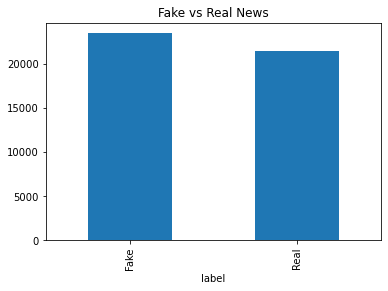

In [5]:
print("Number of samples:", df.shape[0])
print("Class distribution:\n", df["label"].value_counts())

# Visualize class balance
df["label"].value_counts().plot(kind="bar", title="Fake vs Real News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.show()


In [6]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

df["clean_text"] = df["text"].apply(clean_text)



In [7]:
X = df["clean_text"]
y = df["label"]

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_vec = vectorizer.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9846325167037862

Confusion Matrix:
 [[4678   56]
 [  82 4164]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4734
           1       0.99      0.98      0.98      4246

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [13]:
def predict_news(news_text):
    news_text = clean_text(news_text)
    vec = vectorizer.transform([news_text])
    prediction = model.predict(vec)[0]
    return "Real News" if prediction == 1 else "Fake News"

# Test
predict_news("The government has announced new ...")


'Fake News'